<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Comparison</center></b></font>

<font face = "Times New Roman" size = "5"><b><center>Proyecto Final</center></b></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

In [9]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
# ============================
# Cargar datos
# ============================
Train = pd.read_csv("../01_preprocessing_results/preprocessing/T_train_final_objetivo.csv")
Test = pd.read_csv("../01_preprocessing_results/preprocessing/T_test_final_objetivo.csv")

X_train = Train.iloc[:, :-1]
y_train = Train.iloc[:, -1]

X_test = Test.iloc[:, :-1]
y_test = Test.iloc[:, -1]

# ============================
# Cargar modelos
# ============================
modelo_lin = joblib.load("../02_lineal_regression_results/regression_lineal/modelo_reg_lineal.pkl")
modelo_reg = joblib.load("../04_regularization/reg_lin_ganador/reg_lin_ganador_bundle/modelo_elasticnet.pkl")
modelo_rf = joblib.load("../05_machine_learning_alternative/modelo_random_forest.pkl")

# ============================
# Función de evaluación
# ============================
def evaluar(nombre, modelo):
    preds = modelo.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {
        "Modelo": nombre,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }

# ============================
# Comparación Final
# ============================
comparacion = pd.DataFrame([
    evaluar("Regresión Lineal", modelo_lin),
    evaluar("Regularización (ElasticNet)", modelo_reg),
    evaluar("Random Forest", modelo_rf),
])

comparacion.set_index("Modelo")


,MAE,RMSE,R2
Modelo,,,
Regresión Lineal,533.090158,1371.658193,0.503863
Regularización (ElasticNet),533.090158,1371.658193,0.503863
Random Forest,338.400120,1149.850002,0.651348


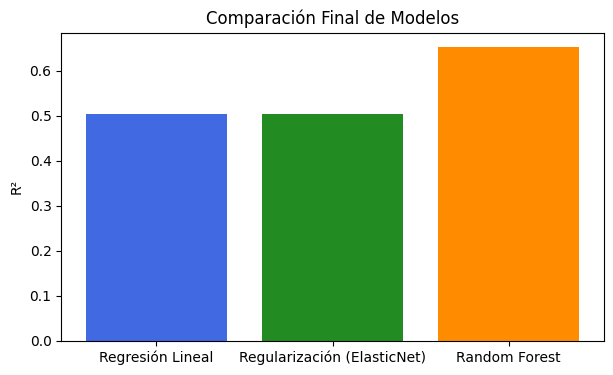

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(comparacion["Modelo"], comparacion["R2"], color=["#4169E1", "#228B22", "#FF8C00"])
plt.ylabel("R²")
plt.title("Comparación Final de Modelos")
plt.show()
